# Sentiment Analysis on IMDB Movie Reviews

## Data Collection
#### Importing libraries.
BeautifulSoup (bs4): It loads the given webpage in its HTML form. We can then inspect and search for the
data of interest and its pattern, and extract the required data from the elements through their HTML tag. <br><br>

In [1]:
import csv
from bs4 import BeautifulSoup 
import requests
import pandas as pd 
import time
time.sleep(2)
import warnings 
warnings.filterwarnings('ignore')

#### Movies to be Scraped:
- black friday
- vampires suck
- son of the mask
- super babies: baby geniuses 2
- spider man no way home

In [2]:
urls = []
url1 = 'https://www.imdb.com/title/tt11649338/reviews?ref_=tt_urv' 
url2 = 'https://www.imdb.com/title/tt1666186/reviews?ref_=tt_urv' 
url3 = 'https://www.imdb.com/title/tt0362165/reviews?ref_=tt_urv' 
url4 = 'https://www.imdb.com/title/tt0270846/reviews?ref_=tt_urv' 
url5 = 'https://www.imdb.com/title/tt10872600/reviews?ref_=tt_urv'

In [3]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)

In [4]:
content = []
for url in urls:
    page = requests.get(url)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser') 
    content.append(soup.find_all('div', class_= 'review-container'))

    # < div class = "lister-item-content" > or < div class = "review-container" > <br>
Print 'content' to inspect what it contains. Similar to 'Inspect' tool, we can see that we are interested in<br>
    < span >< /span >, < span class="point-scale" >, < a class="title" >

In [5]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>3</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw7665520/"> Boring without any comedy or horror.
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur18970655/">Fella_shibby</a></span><span class="review-date">20 December 2021</span>
</div>
<div class="content">
<div class="text show-more__control">This movie has absolutely no comedy n it tried very hard to fall in the horror/comedy genre but failed miserably.<br/><br/>What was the point of tak

Define a dataframe called 'movie' to store movie reviews and the ratings. For a review, if the rating is not given, we ignore that review.

In [6]:
movie = pd.DataFrame(columns=['Review','Rating'])

In [7]:
review = [] 
rating = []
count = 0
for cc in content:
    for c in cc: 
        count+= 1
        
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'}) 
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
            
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''}) 
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip() 
            rVal.append(str1)
            
        val = rVal[0]
        
        if(len(val) > 2): 
            continue
            
        else: 
            review.append(rReview) 
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val)
            
movie['Review'] = review 
movie['Rating'] = rating


Movie review  1
Review:   Boring without any comedy or horror.

Rating:  3

Movie review  2
Review:   Somewhat Watchable

Rating:  4

Movie review  3
Review:   A fun little B movie

Rating:  6

Movie review  4
Review:   Wack Friday!

Rating:  3

Movie review  5
Review:   A black day for horror/comedy fans.

Rating:  3

Movie review  6
Review:   Enjoyable horror comedy...

Rating:  6

Movie review  7
Review:   A decent production with no script

Rating:  4

Movie review  8
Review:   I enjoyed it

Rating:  8

Movie review  9
Review:   Don't Get The Low Rating

Rating:  7

Movie review  10
Review:   Not funny enough...

Rating:  3

Movie review  11
Review:   I told you they'd never die!

Rating:  7

Movie review  12
Review:   Black Friday

Rating:  7

Movie review  13
Review:   needed more punch with the alien goo

Rating:  5

Movie review  14
Review:   Even if u lower your expectations, this will not satisfy the horror fans....

Rating:  4

Movie review  15
Review:   Black Friday Woes



In [8]:
movie.head()

,Review,Rating
0,Boring without any comedy or horror.\n,3
1,Somewhat Watchable\n,4
2,A fun little B movie\n,6
3,Wack Friday!\n,3
4,A black day for horror/comedy fans.\n,3


In [9]:
movie.shape

(119, 2)

In [10]:
movie.to_csv('movie_reviews.csv', index=False)

## Text Processing and Analysis

In [11]:
import string 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import train_test_split

In [12]:
textFeatures = movie['Review'].copy() 
textFeatures.shape

(119,)

In [13]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
    text.append(t)

all_text = ', '.join(t for t in text) 
#print(all_text) 
print(len(all_text))

4950


In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

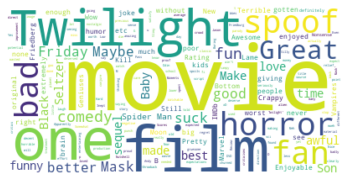

In [15]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

#save the generated image to a file 
#wordcloud.to_file("wordcloud_cb_all.png")

## Sentiment Identification using VADER

In [16]:
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/areeshaasif/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sid = SentimentIntensityAnalyzer() 
c=0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t) 
    print(ss)
    
    if(ss['compound'] >= 0.05): 
        print('positive')
        
    elif(ss['compound'] <= -0.05): 
        print('negative')
        
    else: 
        print('neutral')
    print('\n')

1  Boring without any comedy or horror.

{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.797}
negative


2  Somewhat Watchable

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


3  A fun little B movie

{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.5106}
positive


4  Wack Friday!

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


5  A black day for horror/comedy fans.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


6  Enjoyable horror comedy...

{'neg': 0.487, 'neu': 0.132, 'pos': 0.382, 'compound': -0.2023}
negative


7  A decent production with no script

{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
negative


8  I enjoyed it

{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
positive


9  Don't Get The Low Rating

{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.2057}
positive


10  Not funny enough...

{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}
negative


11  I told you 

## Sentiment Classification using Machine Learning 
### Prepare 'Truth Set'

We will be using 'User Rating' as a truth set to evaluate the results. To prepare 'Truth Set', we'll define three classes - 'positive', 'negative', and 'netural'. On the scale of 0 to 10 Consider review being positvie if the rating is from 6 to 10, negative if the rating is from 0 to 4, netural if rating is 5. We add this information in a new column called 'class-label'.

In [18]:
label = []

for r in movie['Rating']: 
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
    
movie['class-label'] = label

In [19]:
movie['class-label'].value_counts()

1     56
-1    53
0     10
Name: class-label, dtype: int64

We'll work on binary classification, where only two classes are considered 'positive (1)' and 'negative (-1)'. Ignore 'neutral (0)' class. However, the code in this notebook is adopted for multiclass classification problem. 

In [20]:
movie = movie[movie['class-label']!='0']

In [21]:
movie['class-label'].value_counts()

1     56
-1    53
Name: class-label, dtype: int64

In [22]:
textFeatures = movie['Review'].copy() 
textFeatures.shape

(109,)

In [23]:
import nltk 
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/areeshaasif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] 
    return words

In [25]:
#Toy example:
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The above Toy example demonstrates that TextBlob() function has converted given sentence in to tokens or words, converted upper case letters to lower case, removed wild characters.

In [26]:
#countvectorizer convers each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', tokenizer=textblob_tokenizer)

#convers text into a vector based on tf-idf weighting scheme.
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', tokenizer=textblob_tokenizer)

In [27]:
#textFeatures

In [28]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [29]:
#print(tfidf_matrix) #print elements of the matrix.

Print the dimensions of the tfidf_matrix, x rows (number of reviews) and y columns (total words occur in the entire dataset.)

In [30]:
print(tfidf_matrix.shape)
print(count_matrix.shape)

(109, 268)
(109, 268)


Above numbers show dimension of count_matrix, there are X rows (97 reviews), and Y columns (258 word- features) in the transformed dataset. Shape will be different on your dataset.

### Build ML models

In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(tfidf_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(76, 268) (33, 268) (76,) (33,)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

In [33]:
#SVM classifier
from sklearn.svm import SVC 
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0) 
svc.fit(features_train, labels_train) 
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction) 
print('Accuracy:',acc)

from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted') 
print('Precision:',prec)

from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted') 
print('Recall:',recall)

from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted') 
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n') 
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction)) 
#print(prediction)


Evaluation for SVM 

Accuracy: 0.36363636363636365
Precision: 0.304858934169279
Recall: 0.36363636363636365
F-1 measure:  0.2671201397187241

Confusion Matrix:

[[ 1 18]
 [ 3 11]]
              precision    recall  f1-score   support

          -1       0.25      0.05      0.09        19
           1       0.38      0.79      0.51        14

    accuracy                           0.36        33
   macro avg       0.31      0.42      0.30        33
weighted avg       0.30      0.36      0.27        33



In [34]:
# Iterate over the original reviews and predictions
for review, label, pred in zip(movie['Review'],movie['class-label'], prediction):
    print("Review:", review)
    print("Prediction:", pred)
    print('Actual Label:',label)
    print("-----------------------")

Review:  Boring without any comedy or horror.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Somewhat Watchable

Prediction: 1
Actual Label: -1
-----------------------
Review:  A fun little B movie

Prediction: 1
Actual Label: 1
-----------------------
Review:  Wack Friday!

Prediction: 1
Actual Label: -1
-----------------------
Review:  A black day for horror/comedy fans.

Prediction: -1
Actual Label: -1
-----------------------
Review:  Enjoyable horror comedy...

Prediction: 1
Actual Label: 1
-----------------------
Review:  A decent production with no script

Prediction: 1
Actual Label: -1
-----------------------
Review:  I enjoyed it

Prediction: 1
Actual Label: 1
-----------------------
Review:  Don't Get The Low Rating

Prediction: 1
Actual Label: 1
-----------------------
Review:  Not funny enough...

Prediction: 1
Actual Label: -1
-----------------------
Review:  I told you they'd never die!

Prediction: 1
Actual Label: 1
-----------------------
Review:  Black

In [35]:
#Decision Tree
print("\nEvaluation for Decision Tree \n") 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(features_train, labels_train) 
prediction = dtree.predict(features_test) 
acc = accuracy_score(labels_test,prediction) 
print('Accuracy: ',acc)
prec = precision_score(labels_test,prediction, average='weighted') 
print('Precision: ',prec)
recall = recall_score(labels_test,prediction, average='weighted') 
print('Recall: ',recall)

f1 = f1_score(labels_test,prediction, average='weighted') 
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n') 
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.45454545454545453
Precision:  0.5676767676767677
Recall:  0.45454545454545453
F-1 measure:  0.3553719008264463

Confusion Matrix:

[[ 2 17]
 [ 1 13]]
              precision    recall  f1-score   support

          -1       0.67      0.11      0.18        19
           1       0.43      0.93      0.59        14

    accuracy                           0.45        33
   macro avg       0.55      0.52      0.39        33
weighted avg       0.57      0.45      0.36        33



In [36]:
# Iterate over the original reviews and predictions
for review, label, pred in zip(movie['Review'],movie['class-label'], prediction):
    print("Review:", review)
    print("Prediction:", pred)
    print('Actual Label:',label)
    print("-----------------------")

Review:  Boring without any comedy or horror.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Somewhat Watchable

Prediction: 1
Actual Label: -1
-----------------------
Review:  A fun little B movie

Prediction: 1
Actual Label: 1
-----------------------
Review:  Wack Friday!

Prediction: 1
Actual Label: -1
-----------------------
Review:  A black day for horror/comedy fans.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Enjoyable horror comedy...

Prediction: 1
Actual Label: 1
-----------------------
Review:  A decent production with no script

Prediction: 1
Actual Label: -1
-----------------------
Review:  I enjoyed it

Prediction: 1
Actual Label: 1
-----------------------
Review:  Don't Get The Low Rating

Prediction: 1
Actual Label: 1
-----------------------
Review:  Not funny enough...

Prediction: 1
Actual Label: -1
-----------------------
Review:  I told you they'd never die!

Prediction: 1
Actual Label: 1
-----------------------
Review:  Black 

## Using BoW Scheme - Count Matrix

In [37]:
features_train, features_test, labels_train, labels_test = train_test_split(count_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(76, 268) (33, 268) (76,) (33,)


In [38]:
#SVM classifier
from sklearn.svm import SVC 
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0) 
svc.fit(features_train, labels_train) 
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction) 
print('Accuracy:',acc)

from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted') 
print('Precision:',prec)

from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted') 
print('Recall:',recall)

from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted') 
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n') 
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction)) 
#print(prediction)


Evaluation for SVM 

Accuracy: 0.45454545454545453
Precision: 0.49663299663299665
Recall: 0.45454545454545453
F-1 measure:  0.42891319207108675

Confusion Matrix:

[[ 5 14]
 [ 4 10]]
              precision    recall  f1-score   support

          -1       0.56      0.26      0.36        19
           1       0.42      0.71      0.53        14

    accuracy                           0.45        33
   macro avg       0.49      0.49      0.44        33
weighted avg       0.50      0.45      0.43        33



In [39]:
# Iterate over the original reviews and predictions
for review, label, pred in zip(movie['Review'],movie['class-label'], prediction):
    print("Review:", review)
    print("Prediction:", pred)
    print('Actual Label:',label)
    print("-----------------------")

Review:  Boring without any comedy or horror.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Somewhat Watchable

Prediction: 1
Actual Label: -1
-----------------------
Review:  A fun little B movie

Prediction: 1
Actual Label: 1
-----------------------
Review:  Wack Friday!

Prediction: 1
Actual Label: -1
-----------------------
Review:  A black day for horror/comedy fans.

Prediction: -1
Actual Label: -1
-----------------------
Review:  Enjoyable horror comedy...

Prediction: 1
Actual Label: 1
-----------------------
Review:  A decent production with no script

Prediction: 1
Actual Label: -1
-----------------------
Review:  I enjoyed it

Prediction: 1
Actual Label: 1
-----------------------
Review:  Don't Get The Low Rating

Prediction: 1
Actual Label: 1
-----------------------
Review:  Not funny enough...

Prediction: 1
Actual Label: -1
-----------------------
Review:  I told you they'd never die!

Prediction: -1
Actual Label: 1
-----------------------
Review:  Blac

In [40]:
#Decision Tree
print("\nEvaluation for Decision Tree \n") 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(features_train, labels_train) 
prediction = dtree.predict(features_test) 
acc = accuracy_score(labels_test,prediction) 
print('Accuracy: ',acc)
prec = precision_score(labels_test,prediction, average='weighted') 
print('Precision: ',prec)
recall = recall_score(labels_test,prediction, average='weighted') 
print('Recall: ',recall)

f1 = f1_score(labels_test,prediction, average='weighted') 
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n') 
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.45454545454545453
Precision:  0.5676767676767677
Recall:  0.45454545454545453
F-1 measure:  0.3553719008264463

Confusion Matrix:

[[ 2 17]
 [ 1 13]]
              precision    recall  f1-score   support

          -1       0.67      0.11      0.18        19
           1       0.43      0.93      0.59        14

    accuracy                           0.45        33
   macro avg       0.55      0.52      0.39        33
weighted avg       0.57      0.45      0.36        33



In [41]:
# Iterate over the original reviews and predictions
for review, label, pred in zip(movie['Review'],movie['class-label'], prediction):
    print("Review:", review)
    print("Prediction:", pred)
    print('Actual Label:',label)
    print("-----------------------")

Review:  Boring without any comedy or horror.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Somewhat Watchable

Prediction: 1
Actual Label: -1
-----------------------
Review:  A fun little B movie

Prediction: 1
Actual Label: 1
-----------------------
Review:  Wack Friday!

Prediction: 1
Actual Label: -1
-----------------------
Review:  A black day for horror/comedy fans.

Prediction: 1
Actual Label: -1
-----------------------
Review:  Enjoyable horror comedy...

Prediction: 1
Actual Label: 1
-----------------------
Review:  A decent production with no script

Prediction: 1
Actual Label: -1
-----------------------
Review:  I enjoyed it

Prediction: 1
Actual Label: 1
-----------------------
Review:  Don't Get The Low Rating

Prediction: 1
Actual Label: 1
-----------------------
Review:  Not funny enough...

Prediction: 1
Actual Label: -1
-----------------------
Review:  I told you they'd never die!

Prediction: 1
Actual Label: 1
-----------------------
Review:  Black 